In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

## Read in CSV Files

In [9]:
#Read in Gun1.csv
FileFolder = 'Data/'
FileName = 'HR_Data_snip.csv'
#Gun1 = pd.read_csv(FileFolder+FileName,nrows=50)
Gun1 = pd.read_csv(FileFolder+FileName,delim_whitespace=True,skiprows=[1])
Gun1.describe()

,UNIX,roll,pitch,yaw,heading,latitude,longitude,altitudeMSL,altitudeHAE,northVel,eastVel,upVel,speed,navState,navQuality,navConvergence,GDOP,FOM
count,9.000000e+00,9.00,9.00,9.00,9.00,9.000000,9.000000,9.000000,9.000000,9.00,9.00,9.000000,9.00,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1.524145e+09,-0.02,1.08,-5.86,354.14,30.478109,-86.512408,-35.080000,-35.080000,0.04,-0.08,0.167778,0.09,3.111111,0.888889,1.111111,1.673611,0.888889
std,2.738615e-02,0.00,0.00,0.00,0.00,0.000000,0.000000,0.015811,0.015811,0.00,0.00,0.006667,0.00,0.333333,0.333333,0.333333,0.627604,0.333333
min,1.524145e+09,-0.02,1.08,-5.86,354.14,30.478109,-86.512408,-35.100000,-35.100000,0.04,-0.08,0.150000,0.09,3.000000,0.000000,1.000000,0.000000,0.000000
25%,1.524145e+09,-0.02,1.08,-5.86,354.14,30.478109,-86.512408,-35.090000,-35.090000,0.04,-0.08,0.170000,0.09,3.000000,1.000000,1.000000,1.882812,1.000000
50%,1.524145e+09,-0.02,1.08,-5.86,354.14,30.478109,-86.512408,-35.080000,-35.080000,0.04,-0.08,0.170000,0.09,3.000000,1.000000,1.000000,1.882812,1.000000
75%,1.524145e+09,-0.02,1.08,-5.86,354.14,30.478109,-86.512408,-35.070000,-35.070000,0.04,-0.08,0.170000,0.09,3.000000,1.000000,1.000000,1.882812,1.000000
max,1.524145e+09,-0.02,1.08,-5.86,354.14,30.478109,-86.512408,-35.060000,-35.060000,0.04,-0.08,0.170000,0.09,4.000000,1.000000,2.000000,1.882812,1.000000


## Convert Data Series to DateTime
- Convert Unix time to UTC
- Transform UTC to US/Central
- Downsample from 100Hz to 1Hz

In [13]:
Gun1['Date'] = pd.to_datetime(Gun1['UNIX'],unit='s',origin='unix')
Gun1DT = Gun1.set_index(pd.DatetimeIndex(Gun1['Date']))
#Gun1DT = Gun1.set_index(pd.DatetimeIndex(Gun1['Date']))
Gun1DT.index
#print(Gun1DT.index.tz)
Gun1DT = Gun1DT.tz_localize('UTC')
#print(Gun1DT.index.tz)
Gun1DT = Gun1DT.tz_convert('US/Central')
#print(Gun1DT.index.tz)
Gun1DS = Gun1DT.resample('S').last()

## Eliminate Erroneous Data 
- Replace Bad data with Nan's
- Verify Statistic Pre/Post Conversion

In [14]:
Gun1DS.describe()

,UNIX,roll,pitch,yaw,heading,latitude,longitude,altitudeMSL,altitudeHAE,northVel,eastVel,upVel,speed,navState,navQuality,navConvergence,GDOP,FOM
count,1.000000e+00,1.00,1.00,1.00,1.00,1.000000,1.000000,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.000000,1.0
mean,1.524145e+09,-0.02,1.08,-5.86,354.14,30.478109,-86.512408,-35.06,-35.06,0.04,-0.08,0.17,0.09,3.0,1.0,1.0,1.882812,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.524145e+09,-0.02,1.08,-5.86,354.14,30.478109,-86.512408,-35.06,-35.06,0.04,-0.08,0.17,0.09,3.0,1.0,1.0,1.882812,1.0
25%,1.524145e+09,-0.02,1.08,-5.86,354.14,30.478109,-86.512408,-35.06,-35.06,0.04,-0.08,0.17,0.09,3.0,1.0,1.0,1.882812,1.0
50%,1.524145e+09,-0.02,1.08,-5.86,354.14,30.478109,-86.512408,-35.06,-35.06,0.04,-0.08,0.17,0.09,3.0,1.0,1.0,1.882812,1.0
75%,1.524145e+09,-0.02,1.08,-5.86,354.14,30.478109,-86.512408,-35.06,-35.06,0.04,-0.08,0.17,0.09,3.0,1.0,1.0,1.882812,1.0
max,1.524145e+09,-0.02,1.08,-5.86,354.14,30.478109,-86.512408,-35.06,-35.06,0.04,-0.08,0.17,0.09,3.0,1.0,1.0,1.882812,1.0


In [15]:
Gun1DS.loc[Gun1DS.latitude<=25,:]=np.nan

## Break DataSets to Relevent Subsets

In [12]:
Gun1Nav = Gun1DS[['navState','navQuality','navConvergence','FOM','GDOP']]
Gun2Nav = Gun2DS[['navState','navQuality','navConvergence','FOM','GDOP']]

Gun1LLA = Gun1DS[['latitude','longitude','altitudeMSL']]
Gun2LLA = Gun2DS[['latitude','longitude','altitudeMSL']]

Gun1Vel = Gun1DS[['northVel','eastVel','upVel','speed']]
Gun2Vel = Gun2DS[['northVel','eastVel','upVel','speed']]

In [13]:
Gun1Nav.describe()

,navState,navQuality,navConvergence,FOM,GDOP
count,11786.000000,11786.000000,11786.000000,11786.000000,11786.000000
mean,2.997455,1.152554,0.935517,2.428899,42.818262
std,0.071307,0.508202,0.245622,3.059236,87.939093
min,1.000000,1.000000,0.000000,1.000000,1.347656
25%,3.000000,1.000000,1.000000,1.000000,1.597656
50%,3.000000,1.000000,1.000000,1.000000,1.820312
75%,3.000000,1.000000,1.000000,1.000000,2.414062
max,3.000000,3.000000,1.000000,9.000000,231.996094


## Calculate Mean Lat/Lon/Alt

In [14]:
AcjLatGun1 = Gun1LLA.latitude.median()
AcjLonGun1 = Gun1LLA.longitude.median()
AcjAltGun1 = Gun1LLA.altitudeMSL.median()
print([AcjLatGun1, AcjLonGun1, AcjAltGun1])

AcjLatGun2 = Gun2LLA.latitude.median()
AcjLonGun2 = Gun2LLA.longitude.median()
AcjAltGun2 = Gun2LLA.altitudeMSL.median()
print([AcjLatGun2, AcjLonGun2, AcjAltGun2])

[30.478109000000003, -86.512396, 50.6]
[30.478021000000002, -86.512388, 52.94]


## Calculate Lat/Lon/Alt Error and convert to Drift in Nautical Miles

In [15]:
[EcefX,EcefY,EcefZ] = cd.lla2ecef(Gun1LLA.latitude.values,Gun1LLA.longitude.values,cd.ft2m(Gun1LLA.altitudeMSL),deg=True)
[EcefX0,EcefY0,EcefZ0] = cd.lla2ecef(AcjLatGun1,AcjLonGun1,cd.ft2m(AcjAltGun1),deg=True)
[E,N,U] = cd.ecef2enu(EcefX,EcefY,EcefZ,EcefX0,EcefY0,EcefZ0)
drift1 = np.sqrt(E**2+N**2+U**2)
[E1,N1,U1] = cd.m2nm([E,N,U])
drift1nm = cd.m2nm(drift1)
print(np.nanmax(drift1nm))
Gun1LLA = Gun1LLA.assign(drift=pd.Series(drift1nm).values)

0.334072308037676


In [16]:
[EcefX,EcefY,EcefZ] = cd.lla2ecef(Gun2LLA.latitude.values,Gun2LLA.longitude.values,cd.ft2m(Gun2LLA.altitudeMSL),deg=True)
[EcefX0,EcefY0,EcefZ0] = cd.lla2ecef(AcjLatGun1,AcjLonGun1,cd.ft2m(AcjAltGun1),deg=True)
[E,N,U] = cd.ecef2enu(EcefX,EcefY,EcefZ,EcefX0,EcefY0,EcefZ0)
drift2 = np.sqrt(E**2+N**2+U**2)
[E2,N2,U2] = cd.m2nm([E,N,U])
drift2nm = cd.m2nm(drift2)
print(np.nanmax(drift2nm))
Gun2LLA = Gun2LLA.assign(drift=pd.Series(drift2nm).values)

0.08717783515444796


## Define Test Event Time Stamps

In [17]:
StabilityStart = '2018-04-19 14:25:00'
StabilityEnd = '2018-04-19 14:30:00'
Test1_Start = '2018-04-19 14:30:00'
Test1_LowOn = '2018-04-19 14:31:00'
Test1_LowOff = '2018-04-19 14:35:00'
Test1_MedOn = '2018-04-19 14:36:00'
Test1_MedOff = '2018-04-19 14:38:00'
Test1_HighOn = '2018-04-19 14:38:30'
Test1_HighOff = '2018-04-19 14:43:00'
Test1_End = '2018-04-19 14:45:00'
Test2_Start = '2018-04-19 14:48:00'
Test2_LowOn = '2018-04-19 14:49:00'
Test2_LowOff = '2018-04-19 14:53:00'
Test2_MedOn = '2018-04-19 14:53:00'
Test2_MedOff = '2018-04-19 14:56:00'
Test2_End = '2018-04-19 15:00:00'
Test3_Start = '2018-04-19 15:00:00'
Test3_RampStart = '2018-04-19 15:00:00'
Test3_RampEnd = '2018-04-19 15:10:00'
Test3_End = '2018-04-19 15:10:00'

# Gun 1 Nav State Plot

<IPython.core.display.Javascript object>


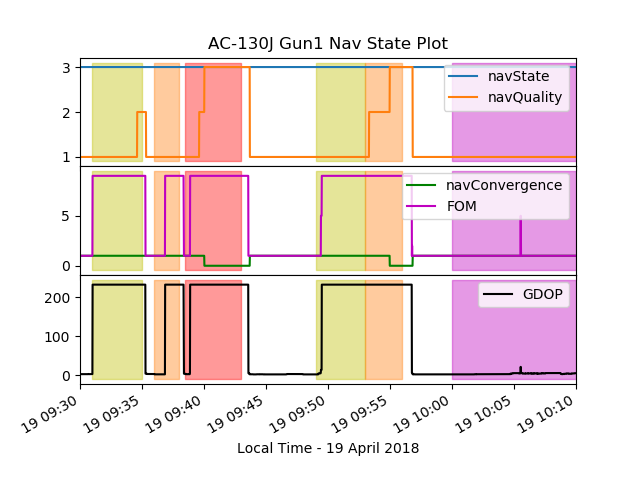

In [18]:
fig, axes = plt.subplots(3,1)
plt.subplots_adjust(wspace=0,hspace=0)

ax0 = Gun1Nav[['navState','navQuality']].plot(ax=axes[0], sharex=True)
ax1 = Gun1Nav[['navConvergence','FOM']].plot(ax=axes[1], sharex=True, color=['g','m'])
ax2 = Gun1Nav[['GDOP']].plot(ax=axes[2], sharex=True,color = 'k')

[BarBottom, BarTop] = ax0.get_ylim()
ax0.fill_between([Test1_LowOn,Test1_LowOff],BarBottom,[BarTop,BarTop],color='y',alpha=.4)
ax0.fill_between([Test1_MedOn,Test1_MedOff],BarBottom,[BarTop,BarTop],color='C1',alpha=.4)
ax0.fill_between([Test1_HighOn,Test1_HighOff],BarBottom,[BarTop,BarTop],color='r',alpha=.4)
ax0.fill_between([Test2_LowOn,Test2_LowOff],BarBottom,[BarTop,BarTop],color='y',alpha=.4)
ax0.fill_between([Test2_MedOn,Test2_MedOff],BarBottom,[BarTop,BarTop],color='C1',alpha=.4)
ax0.fill_between([Test3_RampStart,Test3_RampEnd],BarBottom,[BarTop,BarTop],color='m',alpha=.4)
ax0.legend(loc='upper right')
ax0.set_ylabel('')
ax0.set_xlim([Test1_Start,Test3_End])

[BarBottom, BarTop] = ax1.get_ylim()
ax1.fill_between([Test1_LowOn,Test1_LowOff],BarBottom,[BarTop,BarTop],color='y',alpha=.4)
ax1.fill_between([Test1_MedOn,Test1_MedOff],BarBottom,[BarTop,BarTop],color='C1',alpha=.4)
ax1.fill_between([Test1_HighOn,Test1_HighOff],BarBottom,[BarTop,BarTop],color='r',alpha=.4)
ax1.fill_between([Test2_LowOn,Test2_LowOff],BarBottom,[BarTop,BarTop],color='y',alpha=.4)
ax1.fill_between([Test2_MedOn,Test2_MedOff],BarBottom,[BarTop,BarTop],color='C1',alpha=.4)
ax1.fill_between([Test3_RampStart,Test3_RampEnd],BarBottom,[BarTop,BarTop],color='m',alpha=.4)
ax1.legend(loc='upper right')
ax1.set_ylabel('')
ax1.set_xlim([Test1_Start,Test3_End])

[BarBottom, BarTop] = ax2.get_ylim()
ax2.fill_between([Test1_LowOn,Test1_LowOff],BarBottom,[BarTop,BarTop],color='y',alpha=.4)
ax2.fill_between([Test1_MedOn,Test1_MedOff],BarBottom,[BarTop,BarTop],color='C1',alpha=.4)
ax2.fill_between([Test1_HighOn,Test1_HighOff],BarBottom,[BarTop,BarTop],color='r',alpha=.4)
ax2.fill_between([Test2_LowOn,Test2_LowOff],BarBottom,[BarTop,BarTop],color='y',alpha=.4)
ax2.fill_between([Test2_MedOn,Test2_MedOff],BarBottom,[BarTop,BarTop],color='C1',alpha=.4)
ax2.fill_between([Test3_RampStart,Test3_RampEnd],BarBottom,[BarTop,BarTop],color='m',alpha=.4)
ax2.legend(loc='upper right')
ax2.set_ylabel('')
ax2.set_xlim([Test1_Start,Test3_End])

ax2.set_xlabel('Local Time - 19 April 2018')
ax0.set_title('AC-130J Gun1 Nav State Plot')
plt.savefig('ACJ Gun1 Nav.png',dpi=400, bbox_inches='tight')

# Gun 2 Nav State Plot

<IPython.core.display.Javascript object>


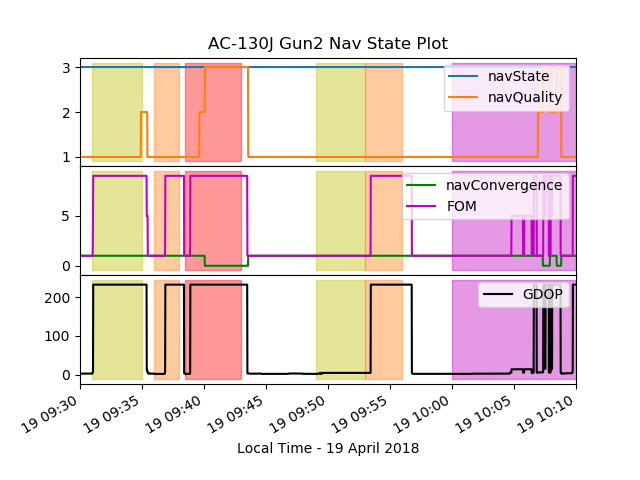

In [19]:
fig, axes = plt.subplots(3,1)
plt.subplots_adjust(wspace=0,hspace=0)

ax0 = Gun2Nav[['navState','navQuality']].plot(ax=axes[0], sharex=True)
ax1 = Gun2Nav[['navConvergence','FOM']].plot(ax=axes[1], sharex=True, color=['g','m'])
ax2 = Gun2Nav[['GDOP']].plot(ax=axes[2], sharex=True,color = 'k')

[BarBottom, BarTop] = ax0.get_ylim()
ax0.fill_between([Test1_LowOn,Test1_LowOff],BarBottom,[BarTop,BarTop],color='y',alpha=.4)
ax0.fill_between([Test1_MedOn,Test1_MedOff],BarBottom,[BarTop,BarTop],color='C1',alpha=.4)
ax0.fill_between([Test1_HighOn,Test1_HighOff],BarBottom,[BarTop,BarTop],color='r',alpha=.4)
ax0.fill_between([Test2_LowOn,Test2_LowOff],BarBottom,[BarTop,BarTop],color='y',alpha=.4)
ax0.fill_between([Test2_MedOn,Test2_MedOff],BarBottom,[BarTop,BarTop],color='C1',alpha=.4)
ax0.fill_between([Test3_RampStart,Test3_RampEnd],BarBottom,[BarTop,BarTop],color='m',alpha=.4)
ax0.legend(loc='upper right')
ax0.set_ylabel('')
ax0.set_xlim([Test1_Start,Test3_End])

[BarBottom, BarTop] = ax1.get_ylim()
ax1.fill_between([Test1_LowOn,Test1_LowOff],BarBottom,[BarTop,BarTop],color='y',alpha=.4)
ax1.fill_between([Test1_MedOn,Test1_MedOff],BarBottom,[BarTop,BarTop],color='C1',alpha=.4)
ax1.fill_between([Test1_HighOn,Test1_HighOff],BarBottom,[BarTop,BarTop],color='r',alpha=.4)
ax1.fill_between([Test2_LowOn,Test2_LowOff],BarBottom,[BarTop,BarTop],color='y',alpha=.4)
ax1.fill_between([Test2_MedOn,Test2_MedOff],BarBottom,[BarTop,BarTop],color='C1',alpha=.4)
ax1.fill_between([Test3_RampStart,Test3_RampEnd],BarBottom,[BarTop,BarTop],color='m',alpha=.4)
ax1.legend(loc='upper right')
ax1.set_ylabel('')
ax1.set_xlim([Test1_Start,Test3_End])

[BarBottom, BarTop] = ax2.get_ylim()
ax2.fill_between([Test1_LowOn,Test1_LowOff],BarBottom,[BarTop,BarTop],color='y',alpha=.4)
ax2.fill_between([Test1_MedOn,Test1_MedOff],BarBottom,[BarTop,BarTop],color='C1',alpha=.4)
ax2.fill_between([Test1_HighOn,Test1_HighOff],BarBottom,[BarTop,BarTop],color='r',alpha=.4)
ax2.fill_between([Test2_LowOn,Test2_LowOff],BarBottom,[BarTop,BarTop],color='y',alpha=.4)
ax2.fill_between([Test2_MedOn,Test2_MedOff],BarBottom,[BarTop,BarTop],color='C1',alpha=.4)
ax2.fill_between([Test3_RampStart,Test3_RampEnd],BarBottom,[BarTop,BarTop],color='m',alpha=.4)
ax2.legend(loc='upper right')
ax2.set_ylabel('')
ax2.set_xlim([Test1_Start,Test3_End])

ax2.set_xlabel('Local Time - 19 April 2018')
ax0.set_title('AC-130J Gun2 Nav State Plot')
plt.savefig('ACJ Gun2 Nav.png',dpi=400, bbox_inches='tight')

# Gun 1 & 2 Drift Time Plot

<IPython.core.display.Javascript object>


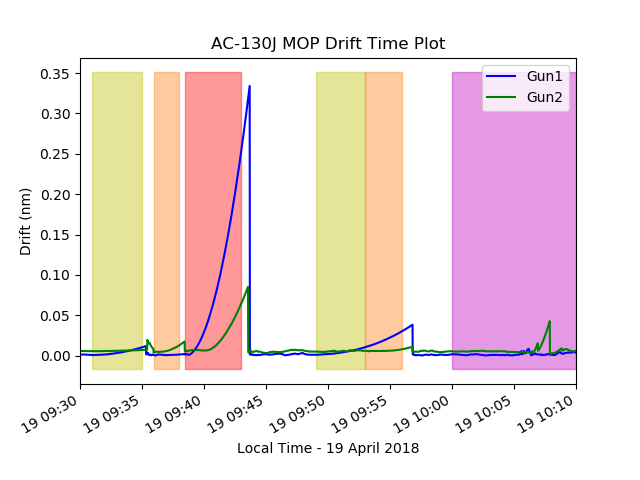

In [20]:
#Gun1LLA.columns=[['Gun1_latitude','Gun1_longitude','Gun1_altitudeMSL','Gun1_drift']]
#Gun2LLA.columns=[['Gun2_latitude','Gun2_longitude','Gun2_altitudeMSL','Gun2_drift']]
#df = pd.concat([Gun1LLA,Gun2LLA],axis=1)
#df.columns

#fig = plt.figure()
fig, axes = plt.subplots(1,1)
plt.subplots_adjust(wspace=0,hspace=0)
ax0 = Gun1LLA['drift'].plot(label='Gun1',color='b')
ax0 = Gun2LLA['drift'].plot(label='Gun2',color='g')



[BarBottom, BarTop] = ax0.get_ylim()
ax0.fill_between([Test1_LowOn,Test1_LowOff],BarBottom,[BarTop,BarTop],color='y',alpha=.4)
ax0.fill_between([Test1_MedOn,Test1_MedOff],BarBottom,[BarTop,BarTop],color='C1',alpha=.4)
ax0.fill_between([Test1_HighOn,Test1_HighOff],BarBottom,[BarTop,BarTop],color='r',alpha=.4)
ax0.fill_between([Test2_LowOn,Test2_LowOff],BarBottom,[BarTop,BarTop],color='y',alpha=.4)
ax0.fill_between([Test2_MedOn,Test2_MedOff],BarBottom,[BarTop,BarTop],color='C1',alpha=.4)
ax0.fill_between([Test3_RampStart,Test3_RampEnd],BarBottom,[BarTop,BarTop],color='m',alpha=.4)
ax0.legend(loc='upper right')
ax0.set_ylabel('')
ax0.set_xlim([Test1_Start,Test3_End])

ax0.set_xlabel('Local Time - 19 April 2018')
ax0.set_ylabel('Drift (nm)')
ax0.set_title('AC-130J MOP Drift Time Plot')

plt.savefig('ACJ Drift Time Plot.png',dpi=400, bbox_inches='tight')

# Gun 1 & 2 Drift Map Plot

<IPython.core.display.Javascript object>


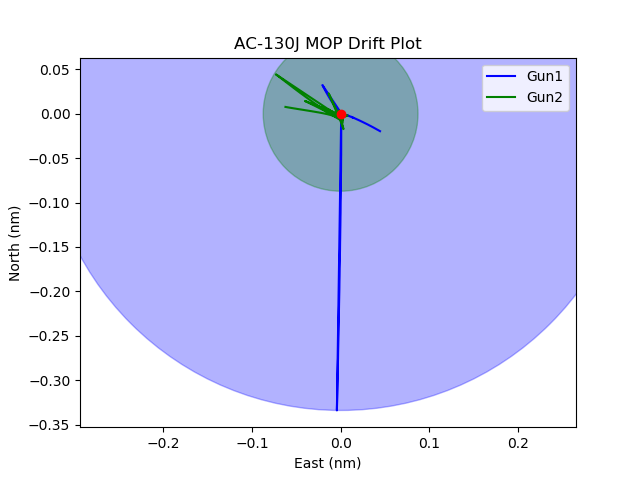

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.axis('equal')
plt.plot(E1,N1,'b',label='Gun1')
plt.plot(E2,N2,'g',label='Gun2')
plt.plot(0,0,'ro')
Circ1 = plt.Circle((0,0),np.nanmax(drift1nm),color='b',alpha=.3)
Circ2 = plt.Circle((0,0),np.nanmax(drift2nm),color='g',alpha=.3)
ax.add_patch(Circ1)
ax.add_patch(Circ2)

ax.legend(loc='best')
ax.set_xlabel('East (nm)')
ax.set_ylabel('North (nm)')
ax.set_title('AC-130J MOP Drift Plot')

plt.savefig('ACJ Drift Map Plot.png',dpi=400, bbox_inches='tight')

# Experimentation with Bokeh

In [22]:
%%opts Overlay [width=600 legend_position='top_left'] Curve (muted_alpha=0.5 muted_color='black')
try:
    import bokeh.sampledata.stocks
except:
    import bokeh.sampledata
    bokeh.sampledata.download()

from bokeh.sampledata.stocks import GOOG, AAPL
goog_dates = np.array(GOOG['date'], dtype=np.datetime64)
aapl_dates = np.array(AAPL['date'], dtype=np.datetime64)
hv.Curve((goog_dates, GOOG['adj_close']), 'Date', 'Stock Index', label='Google') *\
hv.Curve((aapl_dates, AAPL['adj_close']), 'Date', 'Stock Index', label='Apple')

Creating /Users/wdeike/.bokeh directory
Creating /Users/wdeike/.bokeh/data directory
Using data directory: /Users/wdeike/.bokeh/data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3171836 bytes)
   3171836 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (4816256 bytes)
   4816256 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]
Downl

:Overlay
   .Curve.Google :Curve   [Date]   (Stock Index)
   .Curve.Apple  :Curve   [Date]   (Stock Index)

In [23]:
%%opts Overlay [width=800 legend_position='top_left'] Curve (muted_alpha=0.5 muted_color='black')

hv.Curve((Test2DS.index, Test2DS['navState']), '19 Apr 2018', 'Value', label='NavState') *\
hv.Curve((Test2DS.index, Test2DS['navQuality']), '19 Apr 2018', 'Value', label='NavQuality') *\
hv.Curve((Test2DS.index, Test2DS['navConvergence']), '19 Apr 2018', 'Value', label='NavConv') *\
hv.Curve((Test2DS.index, Test2DS['FOM']), '19 Apr 2018', 'Value', label='FOM')

NameError: name 'Test2DS' is not defined

In [ ]:
%%opts Overlay [width=600 legend_position='top_right'] Curve (muted_alpha=0.5 muted_color='black')

hv.Curve((Gun1DS.index, Gun1DS['navState']), '19 April 2018', 'FOM', label='navState') *\
hv.Curve((Gun1DS.index, Gun1DS['navQuality']), '19 April 2018', 'FOM', label='navQuality') *\
hv.Curve((Gun1DS.index, Gun1DS['navConvergence']), '19 April 2018', 'FOM', label='navConvergence')*\
hv.Curve((Gun1DS.index, Gun1DS['FOM']), '19 April 2018', 'FOM', label='FOM')